In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -------- range of the variables ----------
V_S = 7.0                   # service speed [kn]
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

# Define the lower and upper bounds for each variable
lower_bounds = [range_D[0], range_AEdAO[0], range_PdD[0]]
upper_bounds = [range_D[1], range_AEdAO[1], range_PdD[1]]

Load files

In [3]:
import csv
from os import chdir
dir_name = 'best_results/'

def load_best_result(seed, solver_name):
    filename = dir_name+'best_results_' + str(seed) + '_' + solver_name + '.csv'
    history = []
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file, delimiter=' ', quotechar='|')
        counter = 0
        for row in reader:
            if counter == 1:
                params = row
            if counter == 3:
                history = row
            counter += 1
    # clean  
    params  = params[0].split(',')
    if len(history) > 0 and len(history[0]) > 2:
        history = history[0].split(',')
        history = [float(h) for h in history]
    D       = float(params[0])
    AEdAO   = float(params[1])
    PdD     = float(params[2])
    Z       = int(params[3]) if len(params[3]) == 1 else int(float(params[3]))
    fitness = float(params[6])

    result = [Z, (D, AEdAO, PdD), fitness, history]
    return result

In [4]:
results_original = []
solver_name = 'original'
for seed in range(0, 10):
    result = load_best_result(seed, solver_name)
    results_original.append(result)
    
results_openaies = []
solver_name = 'openaies'
for seed in range(0, 10):
    result = load_best_result(seed, solver_name)
    results_openaies.append(result)
    
results_cmaes = []
solver_name = 'cmaes'
for seed in range(0, 10):
    result = load_best_result(seed, solver_name)
    results_cmaes.append(result)
    
results_greedy = []
solver_name = 'greedy'
for seed in range(0, 10):
    result = load_best_result(seed, solver_name)
    results_greedy.append(result)

results_random = []
solver_name = 'random'
for seed in range(0, 10):
    result = load_best_result(seed, solver_name)
    results_random.append(result)

Compare

In [9]:
# result = [Z, (D, AEdAO, PdD), fitness, [history] ]
best_result_original = max(results_original, key=lambda r: r[2])
best_result_openaies = max(results_openaies, key=lambda r: r[2])
best_result_cmaes    = max(results_cmaes, key=lambda r: r[2])
best_result_greedy   = max(results_greedy, key=lambda r: r[2])
best_result_random   = max(results_random, key=lambda r: r[2])

# best fitness
best_fit_original = -best_result_original[2]
best_fit_openaies = -best_result_openaies[2]
best_fit_cmaes    = -best_result_cmaes[2]
best_fit_greedy   = -best_result_greedy[2]
best_fit_random   = -best_result_random[2]

# print best of all
best = min([
            ('original',  best_fit_original),
            ('openai-es', best_fit_openaies),
            ('cmaes',     best_fit_cmaes),
            ('greedy',    best_fit_greedy),
            ('random',    best_fit_random)
           ], key=lambda x: x[1]) 

print('-- Best of all --')
print(best[0])
print('P_B:' , best[1])

-- Best of all --
cmaes
P_B: 81.40450926220613


In [ ]:
best_fits = [('original', best_fit_original),
             ('openaies', best_fit_openaies),
             ('cmaes',    best_fit_cmaes), 
             ('greedy',   best_fit_greedy), 
             ('random',   best_fit_random)
            ]
best_fits.sort(key=lambda x: x[1])
best_fits

## Grafics

In [49]:
colors = ['purple',   'blue',     'orange', 'green',  'red']
labels = ['Original', 'OPENAI-ES', 'CMA-ES', 'Greedy', 'Random']

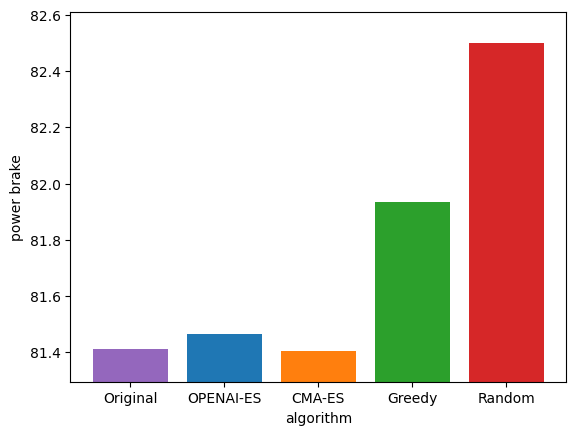

In [50]:
fig, ax = plt.subplots()

counts = [best_fit_original, best_fit_openaies, best_fit_cmaes, best_fit_greedy, best_fit_random]
bar_colors = ['tab:'+c for c in colors]

ax.bar(labels, counts , color=bar_colors)

ax.set_ylabel('power brake')
ax.set_xlabel('algorithm')

# plt.ylim([80, 90])
dif = abs(min(counts) - max(counts)) / 10
plt.ylim([min(counts)-dif, max(counts)+dif])

plt.show()


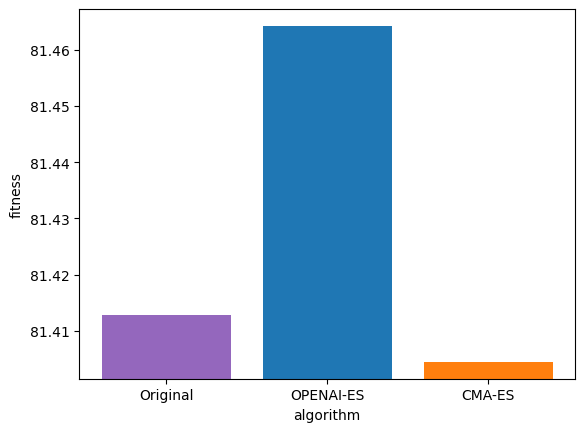

In [51]:
fig, ax = plt.subplots()

counts = counts[:3]
ax.bar(labels[:3], counts, color=bar_colors[:3])

ax.set_ylabel('fitness')
ax.set_xlabel('algorithm')

# plt.ylim([80, 90])
dif = abs(min(counts) - max(counts)) / 20
plt.ylim([min(counts)-dif, max(counts)+dif])

plt.show()


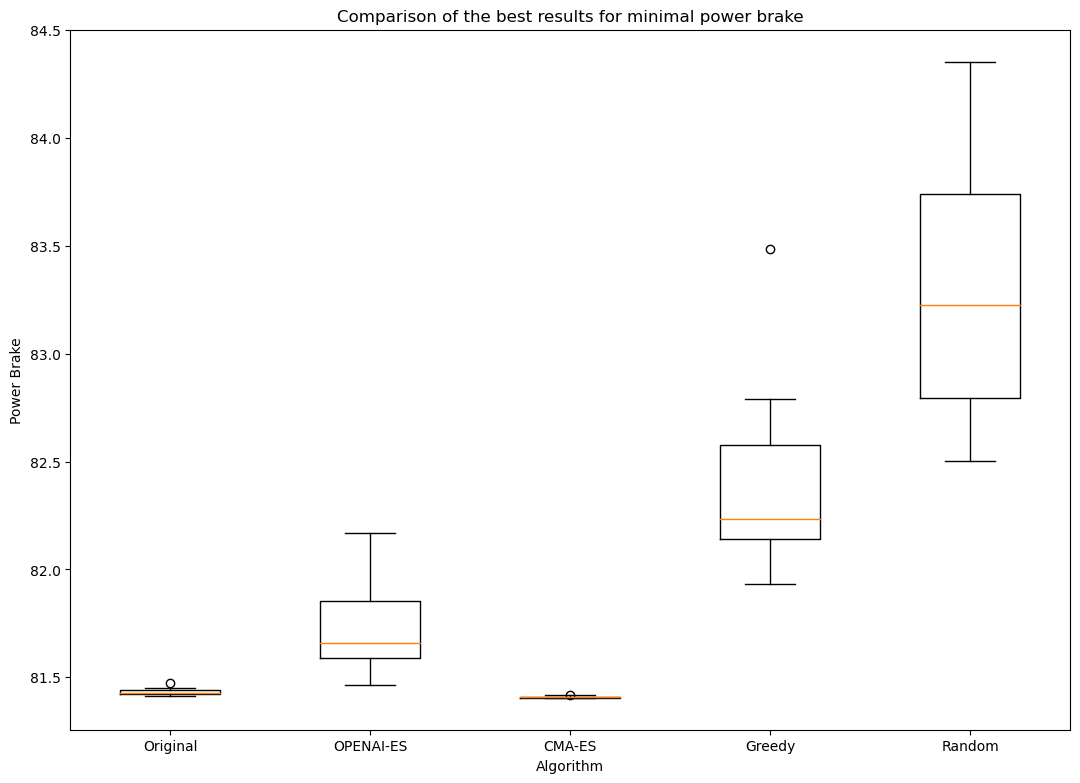

In [54]:
results_fitness_original = [-r[2] for r in results_original]
results_fitness_openaies = [-r[2] for r in results_openaies]
results_fitness_cmaes    = [-r[2] for r in results_cmaes]
results_fitness_greedy   = [-r[2] for r in results_greedy]
results_fitness_random   = [-r[2] for r in results_random]

data = [results_fitness_original,
        results_fitness_openaies,
        results_fitness_cmaes,
        results_fitness_greedy, 
        results_fitness_random ]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(labels)


ax.set(
    title='Comparison of the best results for minimal power brake',
    xlabel='Algorithm',
    ylabel='Power Brake',
)

# Creating plot
bp = ax.boxplot(data)

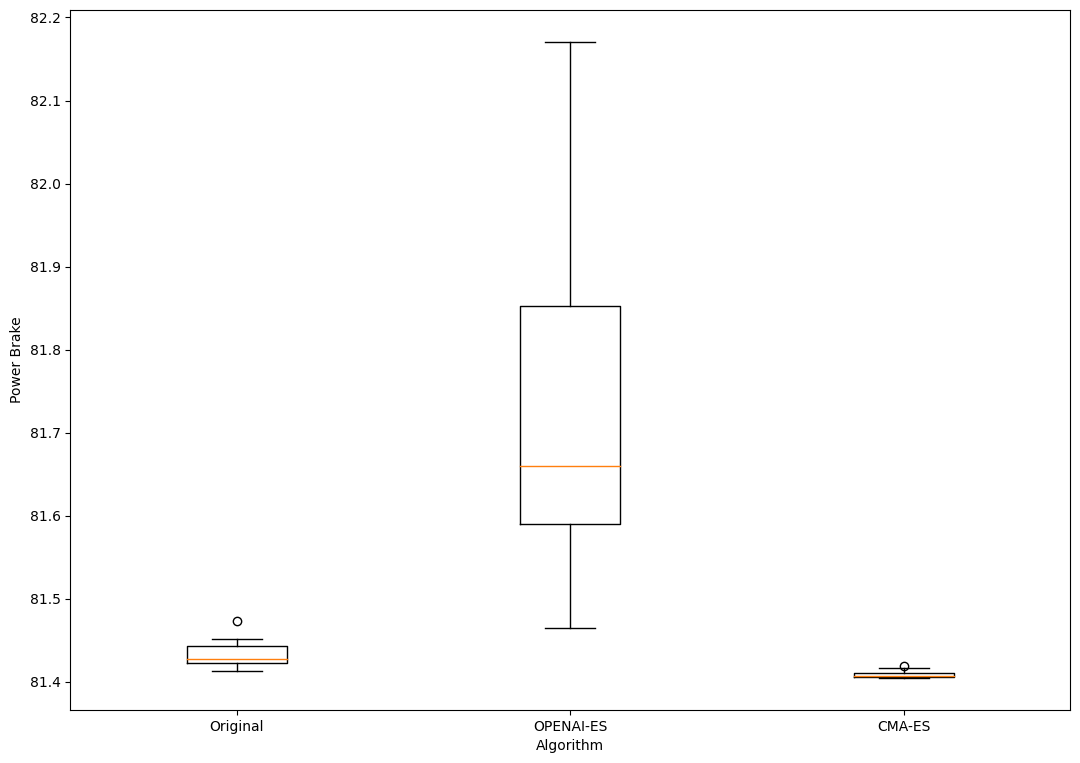

In [55]:
data = [results_fitness_original,
        results_fitness_openaies,
        results_fitness_cmaes
       ]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(labels)
ax.set(
    xlabel='Algorithm',
    ylabel='Power Brake',
)
# Creating plot
bp = ax.boxplot(data)

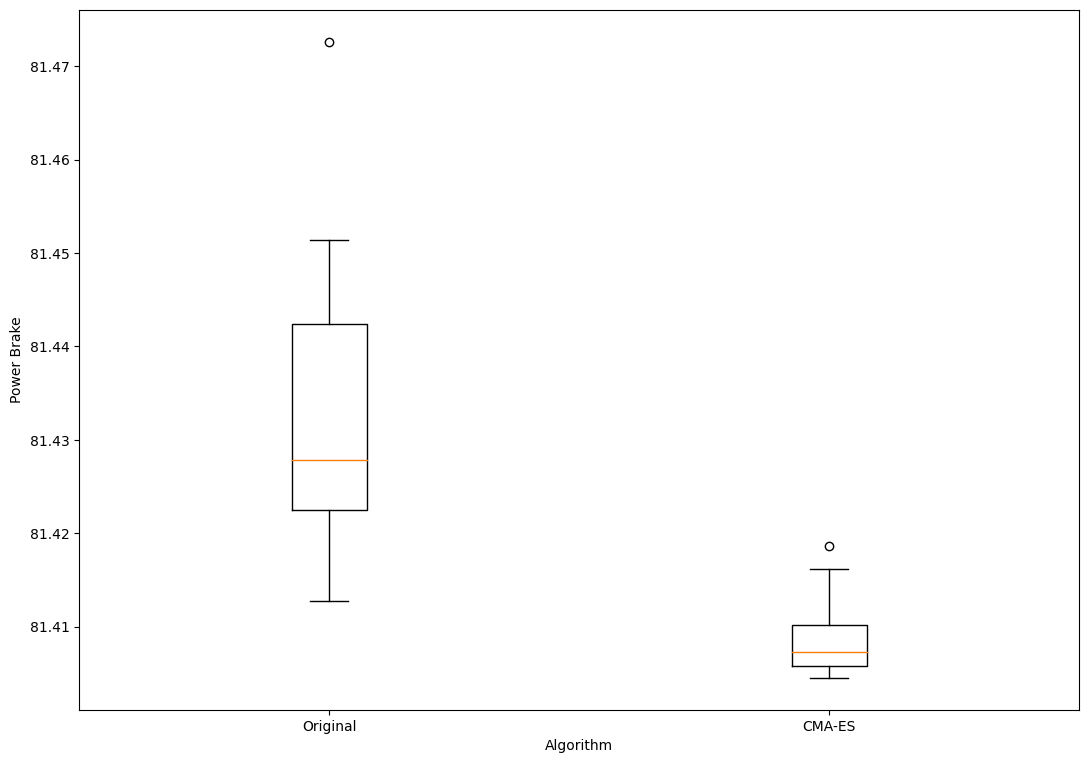

In [56]:
data = [results_fitness_original, results_fitness_cmaes]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(['Original', 'CMA-ES'])
ax.set(
    xlabel='Algorithm',
    ylabel='Power Brake',
)
# Creating plot
bp = ax.boxplot(data)

More stuff

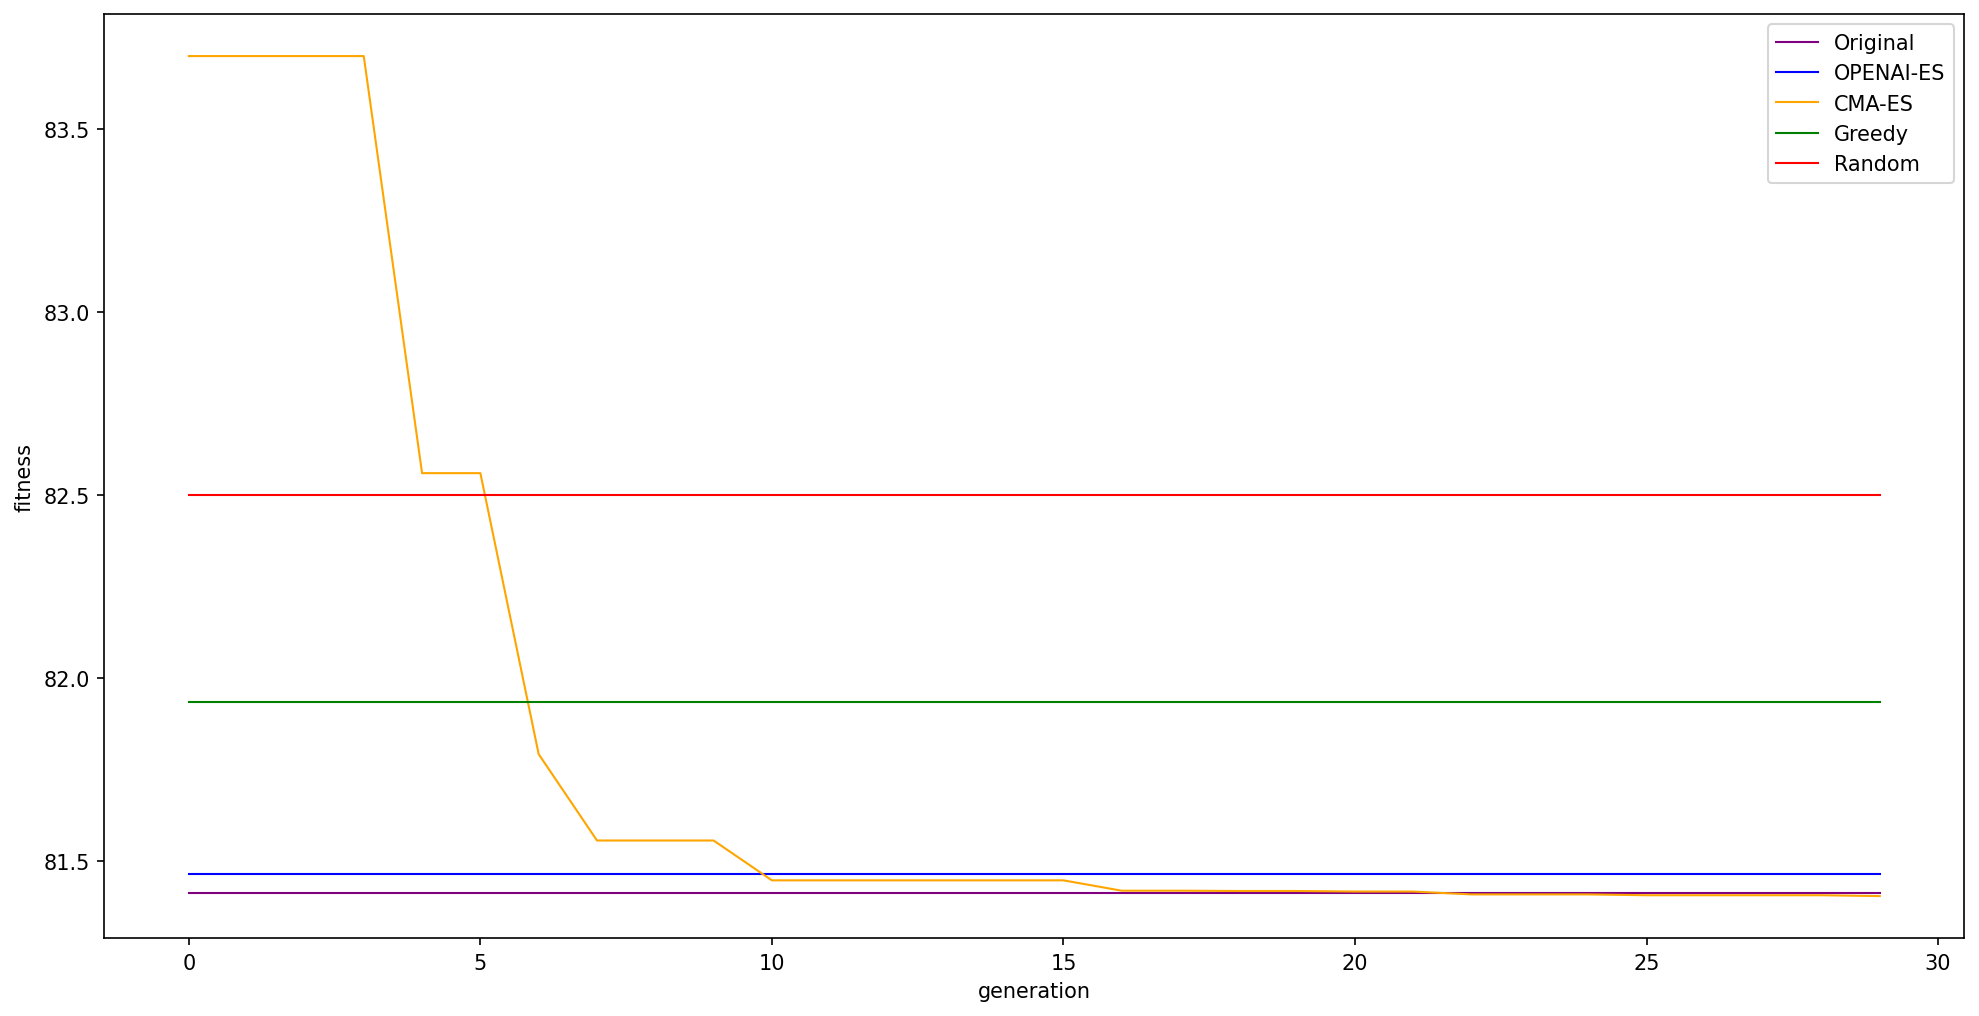

In [57]:
# Create a new figure
plt.figure(figsize=(16,8), dpi=150)

lines = []
results_list = [best_result_original,
               best_result_openaies,
               best_result_cmaes,
               best_result_greedy,
               best_result_random]
for i in range(len(results_list)):
    result = results_list[i]
    color = colors[i]
    label = labels[i]
    history = result[3]
    # if no history, print straight line
    if len(history) < 2:
        history = [result[2] for _ in range(len(best_result_cmaes[3]))]
    history = np.negative(history)
    line, = plt.plot(history, linewidth=1.0, linestyle='-', color=color, label=label) 
    lines.append(line)
        
plt.legend(handles=lines)

plt.xlabel('generation')
plt.ylabel('fitness')
# 
plt.show()

In [16]:
def show_label():
    print('Algorithms without history:')
    plt.figure(figsize=(3,3), dpi=150)
    lines_fake_label = []
    for i in range(len(results_list)):
        results = results_list[i]
        color = colors[i]
        label = labels[i]
        
        # print the name of the algorithms without history
        history = results[0][3]
        if len(history) < 2:
            print('-',label)
        else:
            line_fake, = plt.plot([1], linewidth=1.0, color=color, linestyle='--', label=label) 
            lines_fake_label.append(line_fake)
    plt.legend(handles=lines_fake_label)
    plt.show()

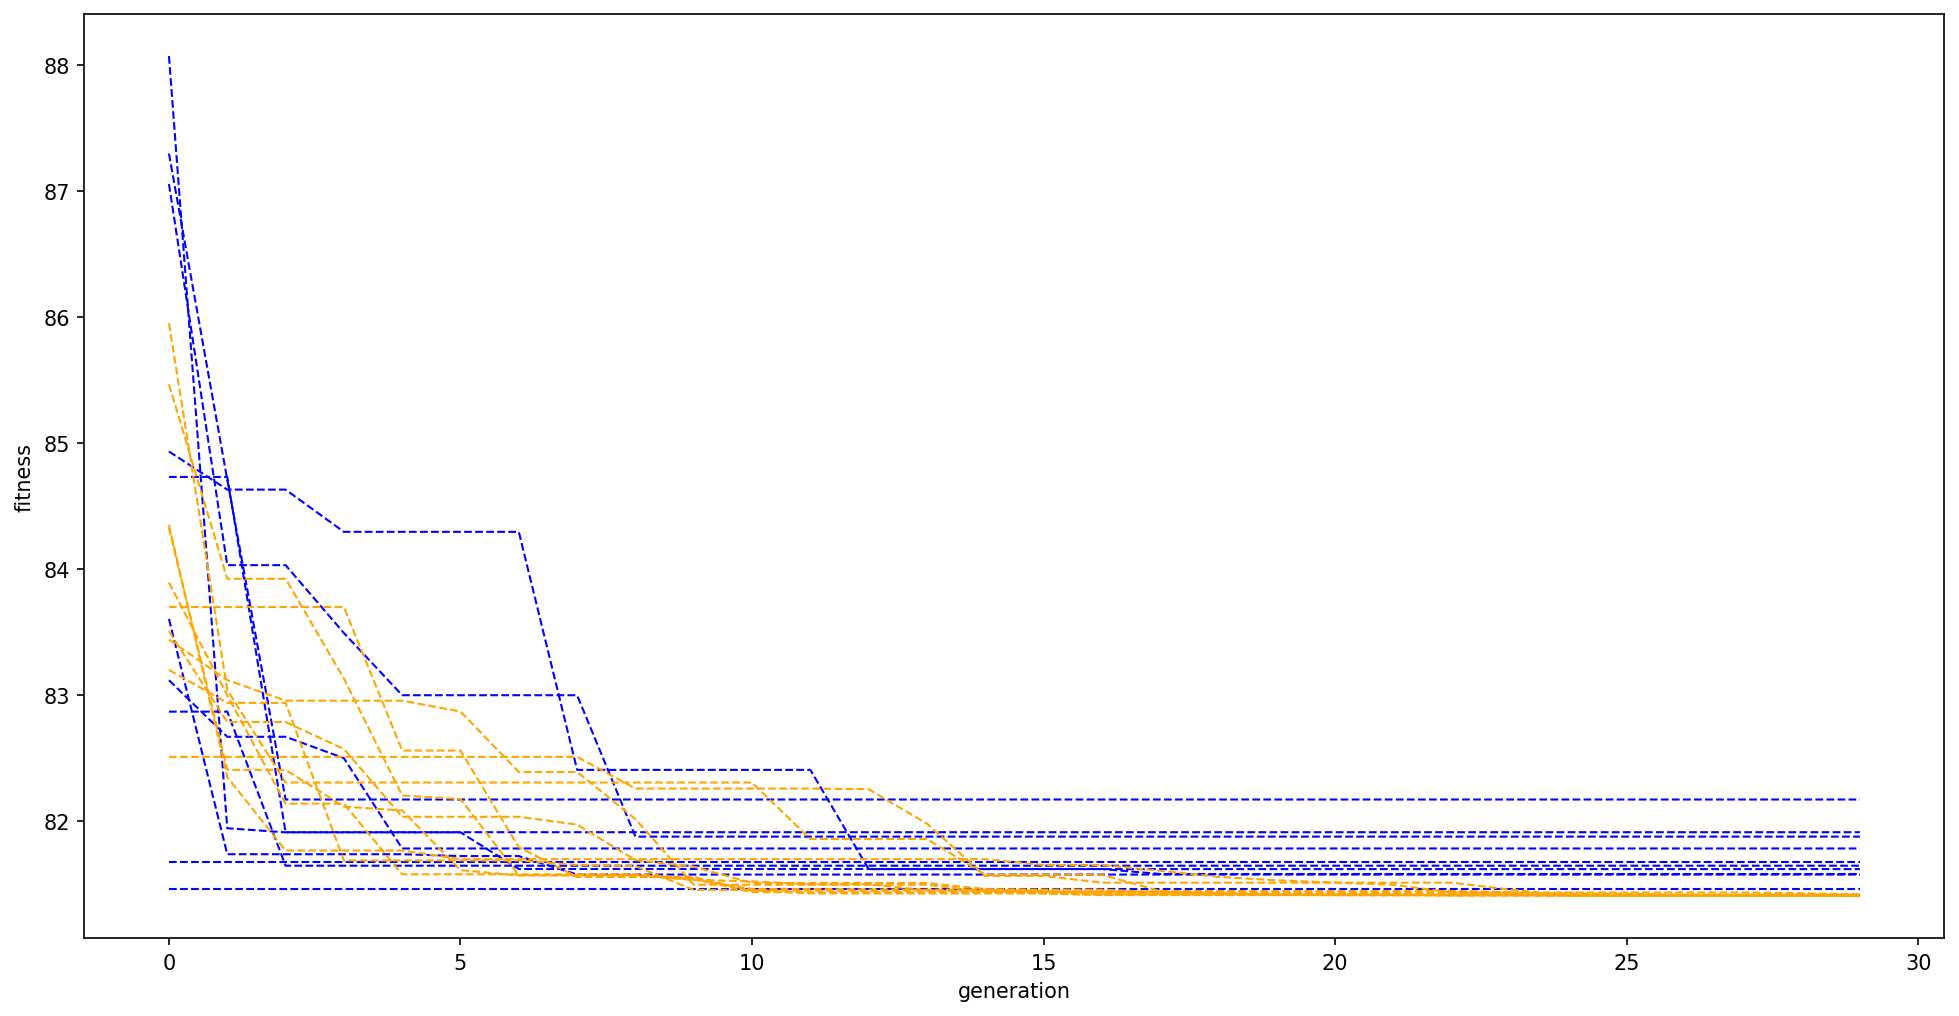

Algorithms without history:
- Original
- Greedy
- Random


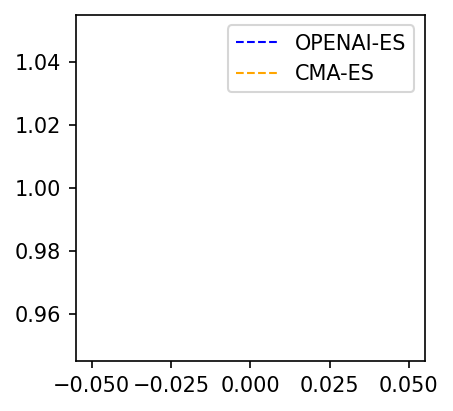

In [60]:
# Create a new figure
plt.figure(figsize=(16,8), dpi=150)

lines = []
results_list = [results_original,
               results_openaies,
               results_cmaes,
               results_greedy,
               results_random]
for i in range(len(results_list)):
    results = results_list[i]
    color = colors[i]
    label = labels[i]
    for r in results:
        history = r[3]
        if len(history) > 1:
            history = np.negative(history)
            line, = plt.plot(history, linewidth=1.0, color=color, linestyle='--', label=label) 
            lines.append(line)
        
        
# plt.legend(handles=lines)

plt.xlabel('generation')
plt.ylabel('fitness')
# 
plt.show()

show_label()

In [ ]:
results_list = [best_result_original,
               best_result_openaies,
               best_result_cmaes,
               best_result_greedy,
               best_result_random]

best_fit_list

In [ ]:
print("Best of all")
best_of_all = max([best_result_openaies, best_result_cmaes], key=(lambda r: r[2]))

Z             =  best_of_all[0]
D, AEdAO, PdD =  best_of_all[1]
P_B           = -best_of_all[2]
print("D:",D,"Z:",Z,"AEdAO:",AEdAO,"PdD:",PdD)
print("P_B:",P_B)

In [ ]:
# create_history_fig(['openaies', 'cmaes'], [best_result_openaies[3], best_result_cmaes[3]])
h = best_result_cmaes[3]
[(i, h[i]) for i in range(len(h))]

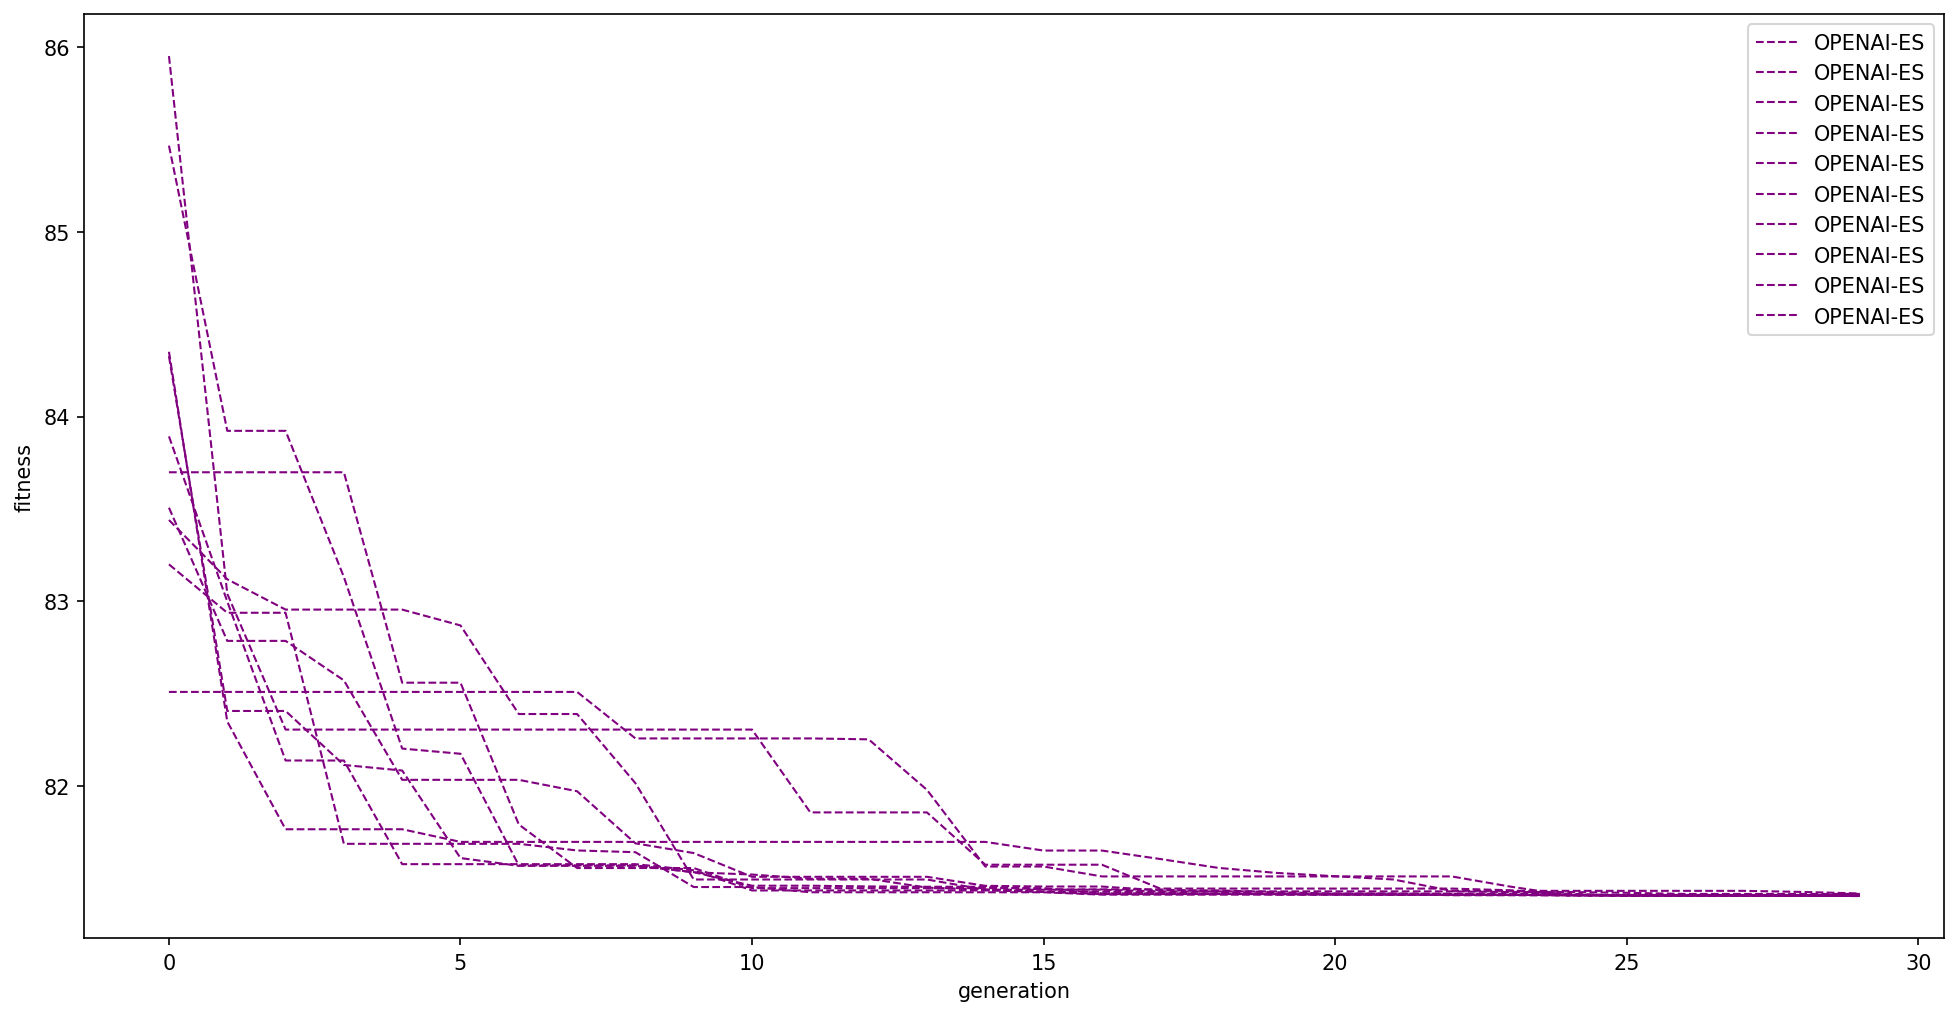

In [61]:
# Create a new figure
plt.figure(figsize=(16,8), dpi=150)

lines = []
# colors = ['blue', 'orange', 'green']
for r in results_cmaes:
    z = r[0]
    history = r[3]
    history = np.negative(history)
#     line, = plt.plot(history, linewidth=1.0, color=colors[0], linestyle="solid" if z == best_Z_openaies else '--', label='OPENAI-ES') 
    line, = plt.plot(history, linewidth=1.0, color=colors[0], linestyle='--', label='OPENAI-ES') 
    lines.append(line)
    
plt.legend(handles=lines)

plt.xlabel('generation')
plt.ylabel('fitness')

plt.show()

In [64]:
def show_img_for_Z(Z_):
    # get the history of Z
    z_history_openaies = [r[3] for r in results_openaies if r[0] == Z_][0]
    z_history_cmaes    = [r[3] for r in results_cmaes    if r[0] == Z_][0]
    # make fitness positive
    z_history_openaies = np.negative(z_history_openaies)
    z_history_cmaes    = np.negative(z_history_cmaes)

    # Create a new figure
    plt.figure(figsize=(16,8), dpi=150)

    line_openaies, = plt.plot(z_history_openaies, linewidth=1.0, label=str(Z_)+' OPENAI-ES')
    line_cmaes,    = plt.plot(z_history_cmaes,    linewidth=1.0, label=str(Z_)+' CMAES')  
    
    plt.legend(handles=[line_openaies, line_cmaes])

    plt.xlabel('generation')
    plt.ylabel('fitness')

    plt.show()
    
# for z in range(range_Z[0], range_Z[1]+1):
#     show_img_for_Z(z)

In [ ]:
print('Best of all')
Z             =  best_of_all[0]
D, AEdAO, PdD =  best_of_all[1]
P_B           = -best_of_all[2]
# print("D:",D,"Z:",Z,"AEdAO:",AEdAO,"PdD:",PdD)
print("P_B:",P_B)

In [ ]:
D     = 0.800
Z     = 5
AEdAO = 0.6053
PdD   = 0.6946

# P_B, n = run_octave_evaluation(V_S, D, Z, AEdAO, PdD)
# cristopher_P_B = P_B
# cristopher_P_B
print(81.36300651084139)

In [41]:
data = [results_original,
        results_openaies,
        results_cmaes,
        results_greedy, 
        results_random ]

big_zs = np.ones(8)
big_zs *= float('inf')
for r_solver in data:
    zs = np.ones(8)
    zs *= float('inf')
    for r in r_solver:
        z = r[0]
        fit = -r[2]
        zs[z] = min(zs[z], fit)
    for z in range(8):
        big_zs[z] = min(zs[z], big_zs[z])
        
for z in range(8):
    if big_zs[z] != 0 and big_zs[z] != float('inf'):
        print('Z:',z, 'fit:',big_zs[z])
            
#     print(big_zs)


Z: 4 fit: 82.78937270234336
Z: 5 fit: 81.40450926220613
Z: 6 fit: 81.78238242745375
Z: 7 fit: 83.2782896364101
